In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/adamaskari/Downloads/data_house.csv.zip')
df = df.drop(['yr_renovated', 'long', 'lat', 'date', 'Unnamed: 0', 'id'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [2]:
df['mean_zipcode_price'] = df.groupby('zipcode')['price'].transform('mean')
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21613 non-null  float64
 1   bedrooms            21613 non-null  int64  
 2   bathrooms           21613 non-null  float64
 3   sqft_living         21613 non-null  int64  
 4   sqft_lot            21613 non-null  int64  
 5   floors              21613 non-null  float64
 6   waterfront          21613 non-null  int64  
 7   view                21613 non-null  int64  
 8   condition           21613 non-null  int64  
 9   grade               21613 non-null  int64  
 10  sqft_above          21613 non-null  int64  
 11  sqft_basement       21613 non-null  int64  
 12  yr_built            21613 non-null  int64  
 13  zipcode             21613 non-null  int64  
 14  sqft_living15       21613 non-null  int64  
 15  sqft_lot15          21613 non-null  int64  
 16  mean

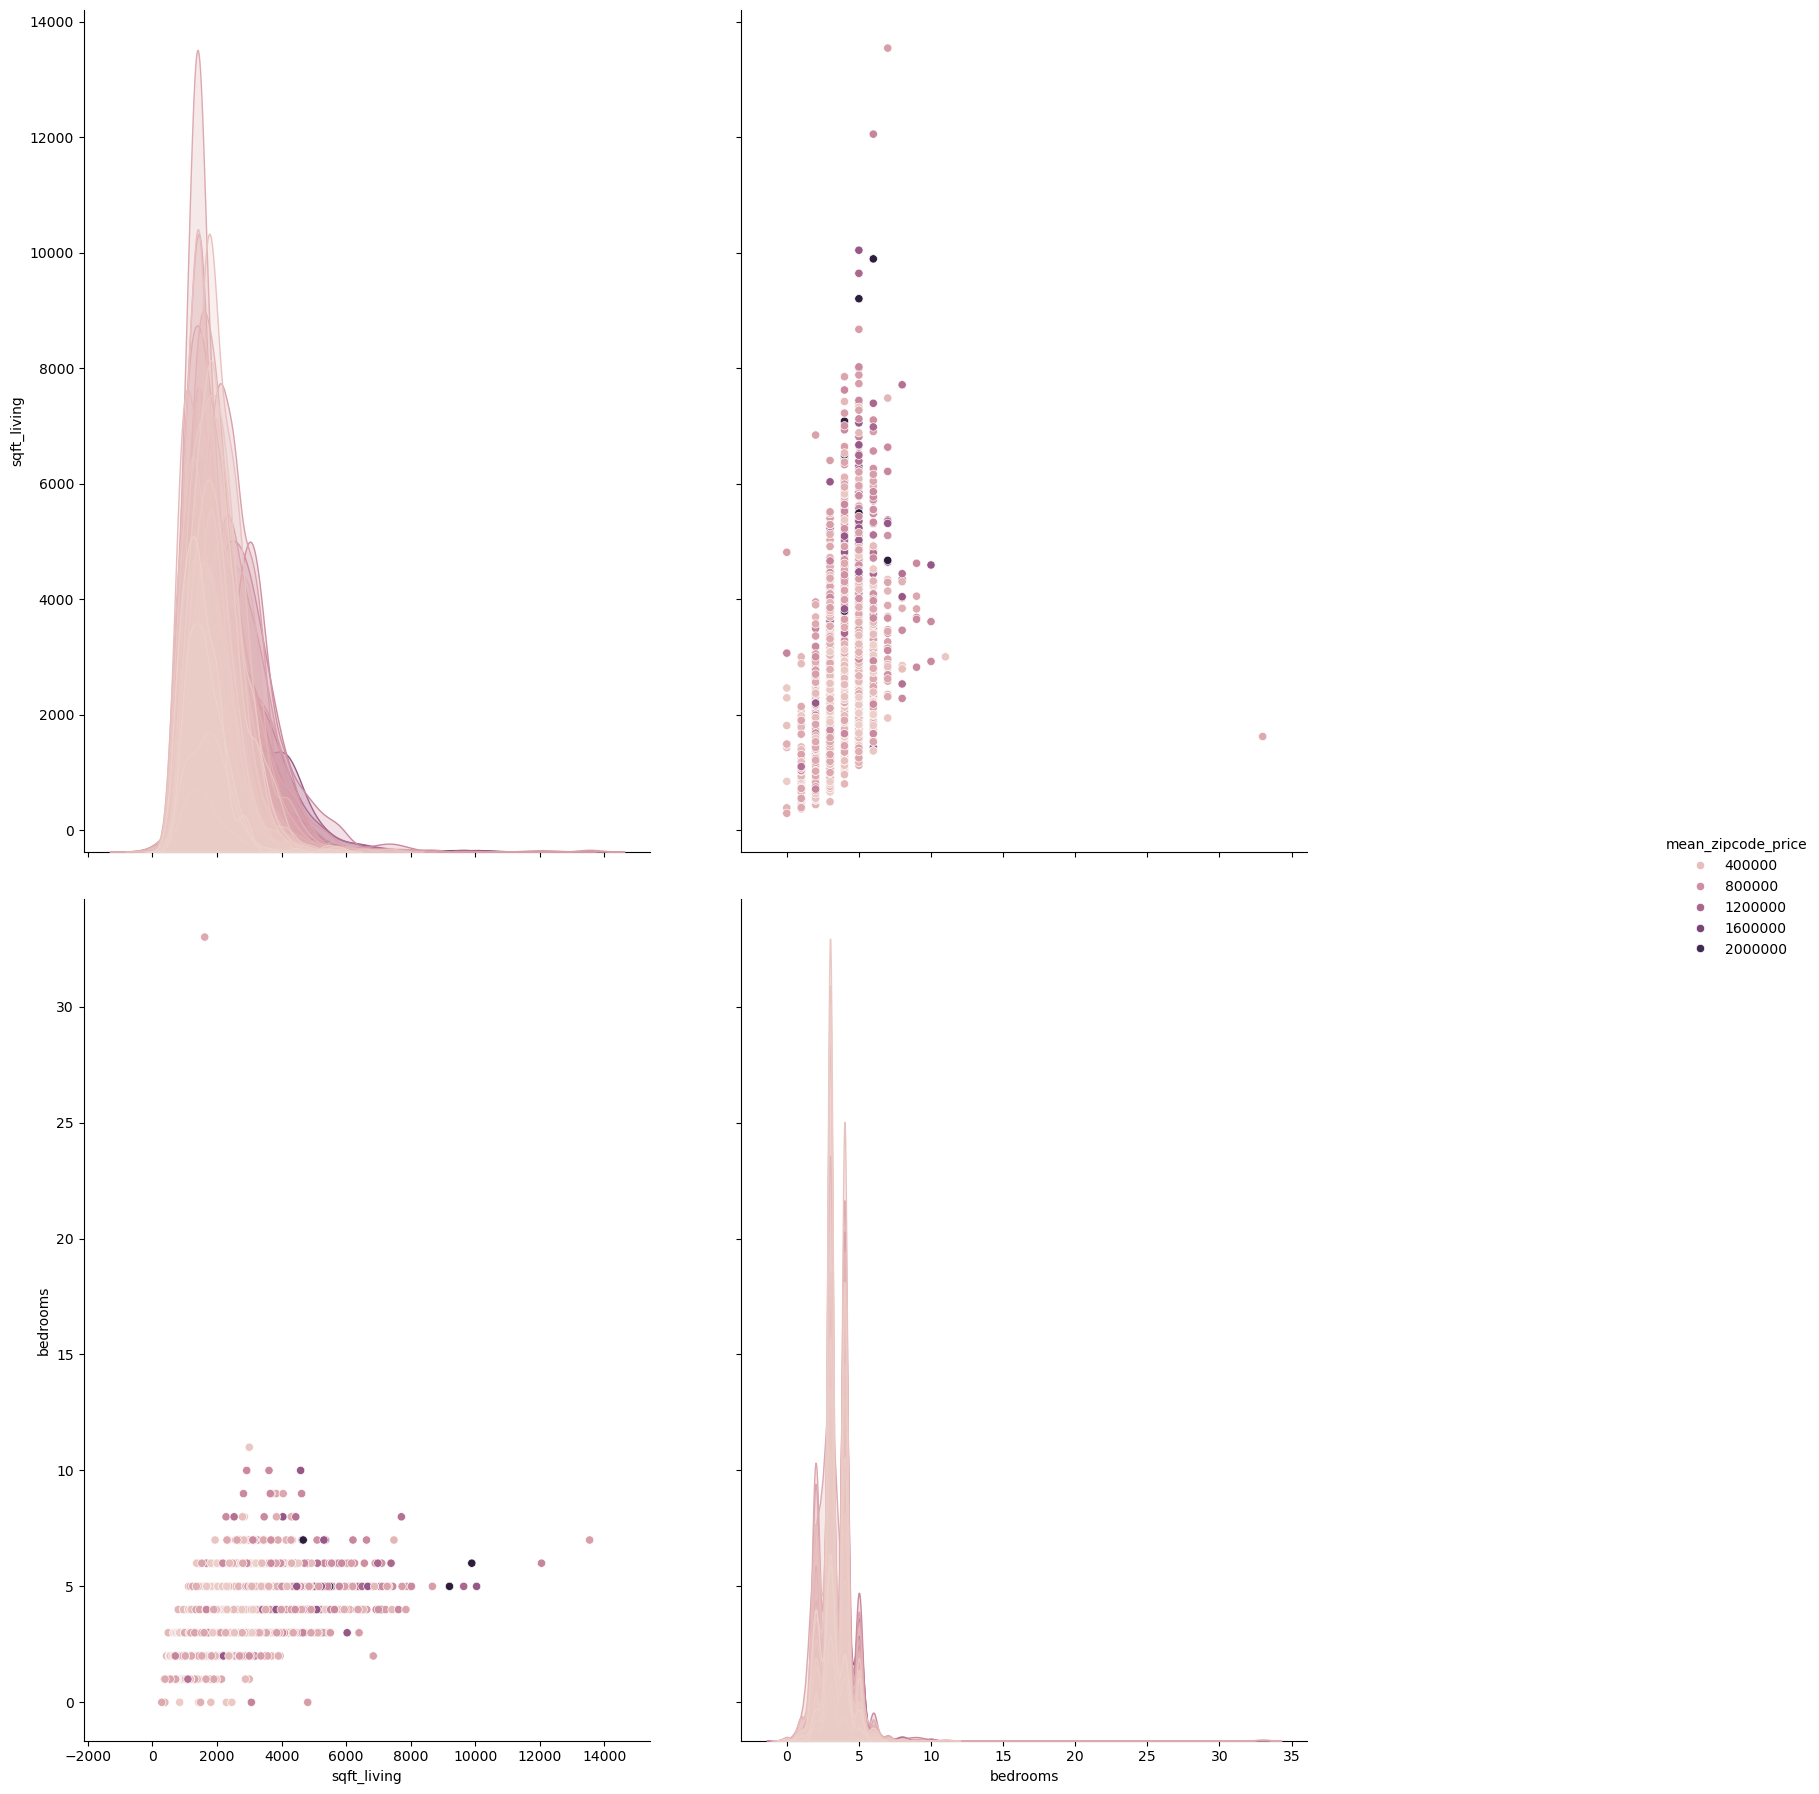

In [4]:

selected_columns = ["sqft_living", "mean_zipcode_price", "bedrooms"] 
g = sns.pairplot(df[selected_columns], hue="mean_zipcode_price")

g.fig.set_size_inches(20, 20)
plt.show()

In [5]:
features = df.drop(columns = ["price"])
target = df["price"]

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

mask = (df["price"] >= (Q1 - 1.5 * IQR)) & (df["price"] <= (Q3 + 1.5 * IQR))

df = df[mask]

In [218]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,98115,1770,6380,619900.547170
16909,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,98006,2310,9700,859684.779116
16123,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,98074,1710,9862,685605.775510
12181,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,98031,1970,7000,300539.890511
12617,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,98119,1790,4763,849448.016304


In [219]:
y_train.head()

5268     495000.0
16909    635000.0
16123    382500.0
12181    382500.0
12617    670000.0
Name: price, dtype: float64

In [220]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [221]:
pred = knn.predict(X_test)
pred

array([ 327133.66666667, 1038333.33333333,  490333.33333333, ...,
        407666.66666667,  288000.        ,  532666.66666667],
      shape=(4323,))

In [222]:
y_test.values

array([ 297000., 1578000.,  562100., ...,  369950.,  300000.,  575950.],
      shape=(4323,))

In [223]:
knn.score(X_test, y_test)

0.703264691294633

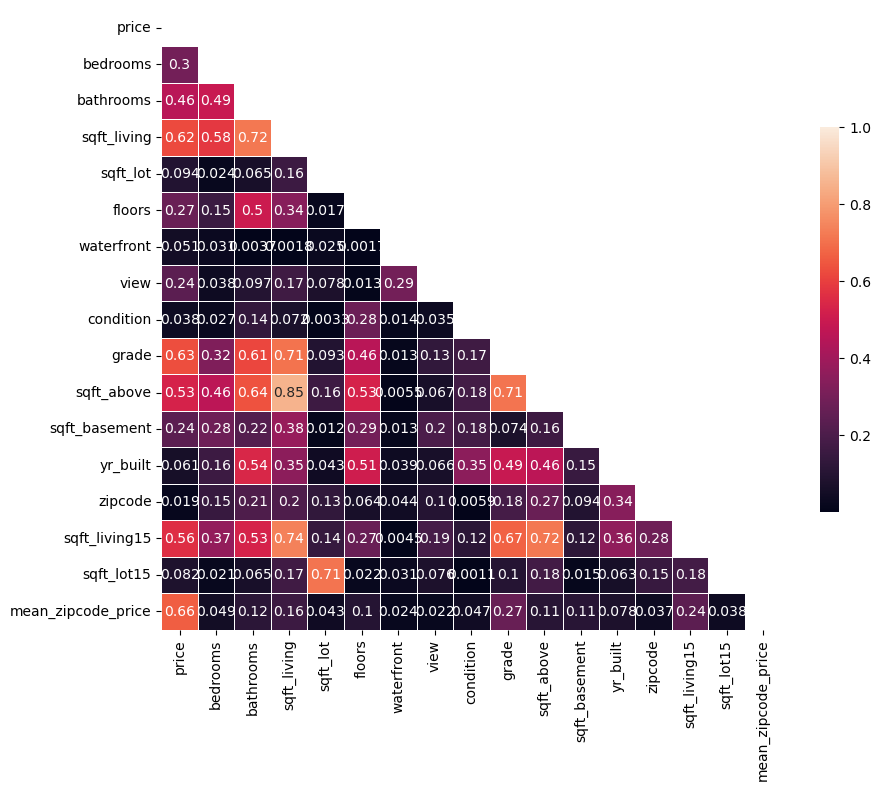

In [224]:
corr=np.abs(df.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [225]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()

In [226]:
normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [227]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [228]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

X_train_reduced = X_train_norm.drop(columns=["sqft_living", "mean_zipcode_price", "bedrooms"])
X_test_reduced = X_test_norm.drop(columns=["sqft_living", "mean_zipcode_price", "bedrooms"])

In [229]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,98115,1770,6380,619900.547170
16909,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,98006,2310,9700,859684.779116
16123,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,98074,1710,9862,685605.775510
12181,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,98031,1970,7000,300539.890511
12617,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,98119,1790,4763,849448.016304


In [230]:
X_train_norm

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
0,0.090909,0.12500,0.096604,0.003023,0.0,0.0,0.0,0.75,0.500000,0.085526,0.103734,0.347826,0.575758,0.240063,0.006581,0.200183
1,0.090909,0.31250,0.112453,0.006348,0.0,0.0,0.0,0.75,0.583333,0.100877,0.118257,0.695652,0.025253,0.334617,0.010395,0.324660
2,0.090909,0.18750,0.060377,0.005659,0.0,0.0,0.0,0.50,0.583333,0.087719,0.000000,0.756522,0.368687,0.229557,0.010581,0.234292
3,0.121212,0.31250,0.144906,0.003973,0.4,0.0,0.0,0.50,0.583333,0.210526,0.000000,0.808696,0.151515,0.275083,0.007293,0.034395
4,0.090909,0.31250,0.113962,0.002570,0.4,0.0,0.0,0.50,0.500000,0.104167,0.116183,0.739130,0.595960,0.243565,0.004723,0.319346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0.151515,0.62500,0.276981,0.056680,0.4,0.0,0.0,0.50,0.750000,0.402412,0.000000,0.852174,0.186869,0.322360,0.073307,0.068827
17286,0.060606,0.31250,0.083774,0.000449,0.4,0.0,0.0,0.50,0.583333,0.095395,0.049793,0.939130,0.530303,0.115742,0.001003,0.044280
17287,0.090909,0.28125,0.156226,0.008741,0.0,0.0,0.0,0.75,0.666667,0.226974,0.000000,0.678261,0.207071,0.406409,0.015780,0.040153
17288,0.121212,0.25000,0.156981,0.046125,0.4,0.0,0.0,0.75,0.583333,0.228070,0.000000,0.678261,0.000000,0.299597,0.021461,0.024150


In [231]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
5268,0.090909,0.31250,0.122264,0.002355,0.8,0.0,0.0,0.50,0.583333,0.177632,0.000000,0.930435,0.666667,0.264577,0.008619,0.079277
16909,0.090909,0.28125,0.110189,0.007201,0.0,0.0,0.0,1.00,0.500000,0.094298,0.124481,0.539130,0.777778,0.248818,0.014159,0.098344
16123,0.151515,0.40625,0.301887,0.003937,0.6,0.0,0.0,0.75,0.750000,0.361842,0.145228,0.234783,0.560606,0.266328,0.003847,0.447077
12181,0.090909,0.31250,0.111698,0.001953,0.2,0.0,0.0,0.50,0.500000,0.107456,0.103734,0.252174,0.585859,0.175276,0.004628,0.177806
12617,0.090909,0.18750,0.080755,0.000392,0.8,0.0,0.0,0.50,0.583333,0.117325,0.000000,0.939130,0.515152,0.168272,0.000593,0.182023


In [232]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,mean_zipcode_price
17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,0.121212,0.3125,0.144151,0.005197,0.4,0.0,0.0,0.5,0.583333,0.209430,0.000000,0.817391,0.166667,0.327613,0.009476,0.149180
2680,0.151515,0.4375,0.203774,0.128188,0.4,0.0,0.0,0.5,0.583333,0.236842,0.112033,0.817391,0.116162,0.115742,0.078811,0.179743
18754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

print(f"The value of R2 on the TEST set is: {knn.score(X_test_reduced, y_test): .2f}")

The value of R2 on the TEST set is:  0.69


In [234]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

knn.fit(X_train_standarized, y_train)

y_train_pred = knn.predict(X_train_standarized)
y_test_pred = knn.predict(X_test_standarized)

print(f"The new R2 is {knn.score(X_test_standarized, y_test): .2f}")

The new R2 is  0.82


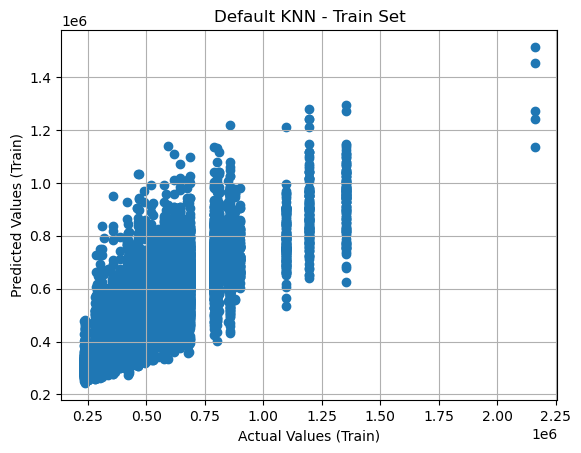

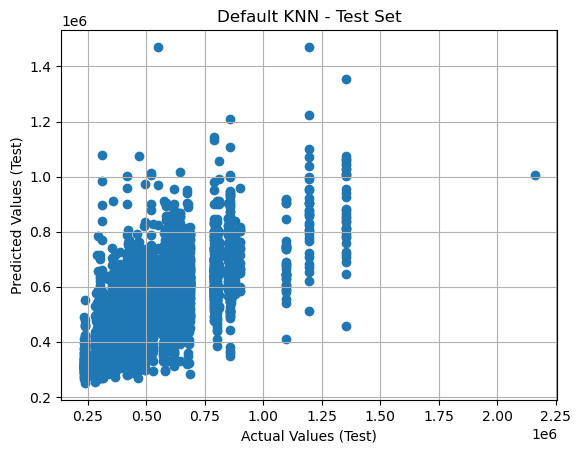

In [235]:
X = df.drop(columns="mean_zipcode_price")
y = df["mean_zipcode_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_default = KNeighborsRegressor()
model_default.fit(X_train, y_train)

y_train_pred = model_default.predict(X_train)
y_test_pred = model_default.predict(X_test)

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_train_default = r2_score_manual(y_train, y_train_pred)
r2_test_default = r2_score_manual(y_test, y_test_pred)

plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Default KNN - Train Set")
plt.grid(True)
plt.show()

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Default KNN - Test Set")
plt.grid(True)
plt.show()

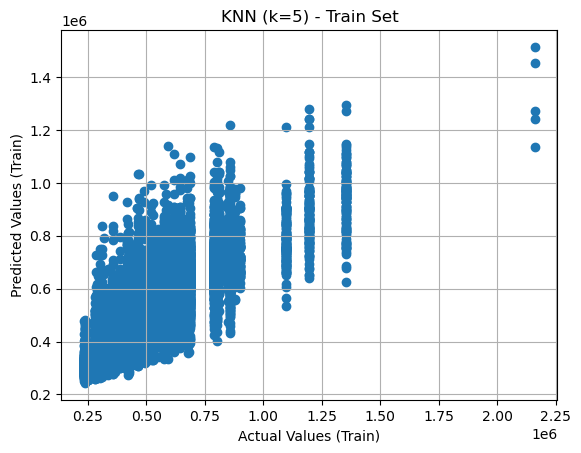

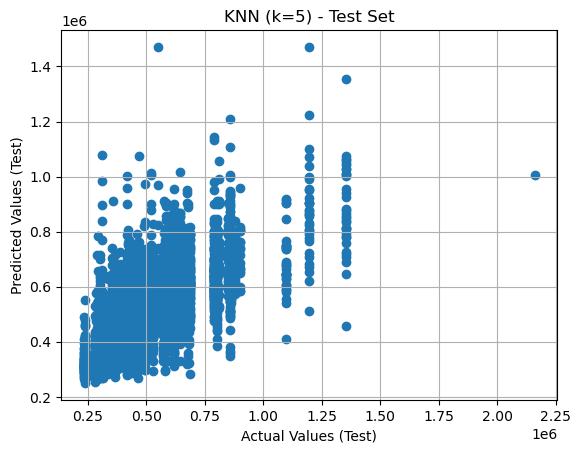

Default KNN R² Train: 0.671
Default KNN R² Test: 0.498
KNN (k=5) R² Train: 0.671
KNN (k=5) R² Test: 0.498


In [236]:
model_k5 = KNeighborsRegressor(n_neighbors=5)
model_k5.fit(X_train, y_train)

y_train_pred_k5 = model_k5.predict(X_train)
y_test_pred_k5 = model_k5.predict(X_test)

r2_train_k5 = r2_score_manual(y_train, y_train_pred_k5)
r2_test_k5 = r2_score_manual(y_test, y_test_pred_k5)

plt.scatter(y_train, y_train_pred_k5)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("KNN (k=5) - Train Set")
plt.grid(True)
plt.show()

plt.scatter(y_test, y_test_pred_k5)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("KNN (k=5) - Test Set")
plt.grid(True)
plt.show()

print(f"Default KNN R² Train: {r2_train_default:.3f}")
print(f"Default KNN R² Test: {r2_test_default:.3f}")
print(f"KNN (k=5) R² Train: {r2_train_k5:.3f}")
print(f"KNN (k=5) R² Test: {r2_test_k5:.3f}")

## Normalization

In [237]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [238]:
scaler = StandardScaler()

scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [239]:
X_train_norm_np = normalizer.transform(X_train)
X_test_norm_np = normalizer.transform(X_test)

In [240]:
X_train_norm_df = pd.DataFrame(X_train_norm_np, columns = X_train.columns, index=X_train.index)
X_train_norm_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
12258,0.275534,0.090909,0.200000,0.141864,0.004628,0.0,0.0,0.00,0.50,0.545455,0.189591,0.000000,0.434783,0.666667,0.151835,0.012338
126,0.351544,0.090909,0.300000,0.251739,0.004653,0.0,0.0,0.50,0.50,0.636364,0.247212,0.176471,0.582609,0.893939,0.496814,0.014396
2745,0.698337,0.090909,0.266667,0.358832,0.003538,0.2,0.0,0.25,0.75,0.636364,0.278810,0.397059,0.400000,0.575758,0.419908,0.010385
20704,0.432304,0.121212,0.400000,0.278164,0.002777,0.4,0.0,0.00,0.50,0.636364,0.371747,0.000000,0.973913,0.136364,0.450670,0.007954
13239,0.228979,0.060606,0.133333,0.061196,0.002738,0.0,0.0,0.00,0.50,0.454545,0.081784,0.000000,0.234783,0.631313,0.085915,0.007838


In [241]:
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns = X_test.columns, index=X_test.index)
X_test_norm_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
16607,0.327791,0.151515,0.366667,0.276773,0.005936,0.0,0.0,0.0,0.50,0.636364,0.187732,0.360294,0.513043,0.888889,0.433092,0.013224
15557,0.147268,0.090909,0.133333,0.115438,0.019221,0.0,0.0,0.0,0.75,0.454545,0.154275,0.000000,0.295652,0.348485,0.134256,0.597604
1285,0.185273,0.090909,0.133333,0.132128,0.008232,0.0,0.0,0.0,0.75,0.545455,0.176580,0.000000,0.626087,0.287879,0.364975,0.033393
5964,0.695487,0.090909,0.333333,0.229485,0.002108,0.4,0.0,0.0,0.75,0.727273,0.306691,0.000000,0.869565,1.000000,0.222149,0.005981
7051,0.142518,0.090909,0.266667,0.162726,0.004374,0.0,0.0,0.0,0.50,0.545455,0.217472,0.000000,0.591304,0.010101,0.250714,0.012488


In [242]:
X_train_standarized_np = scaler.transform(X_train)
X_test_standarized_np = scaler.transform(X_test)

X_train_standarized_df = pd.DataFrame(X_train_standarized_np, columns = X_train.columns, index=X_train.index)
X_test_standarized_df  = pd.DataFrame(X_test_standarized_np, columns = X_test.columns, index=X_test.index)


In [243]:
X_train_standarized_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04,1.637300e+04
mean,1.104459e-16,-8.853034e-17,-1.215122e-17,-6.835063e-17,-1.735889e-18,-8.375664e-17,2.213258e-17,3.862353e-17,-1.753248e-16,-9.113417e-17,-8.158678e-17,2.777422e-17,1.174980e-15,1.264905e-13,7.811500e-17,-6.943556e-18
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.923206e+00,-3.613875e+00,-2.877498e+00,-2.175261e+00,-3.490493e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-3.716117e+00,-6.254325e+00,-1.946993e+00,-6.532021e-01,-2.434469e+00,-1.456068e+00,-2.465770e+00,-4.549565e-01
25%,-7.771828e-01,-3.575292e-01,-7.784280e-01,-7.456658e-01,-2.385836e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-6.236654e-01,-5.143526e-01,-7.286909e-01,-6.532021e-01,-6.822087e-01,-8.553717e-01,-7.367587e-01,-2.847592e-01
50%,-1.898459e-01,-3.575292e-01,-7.873809e-02,-1.532210e-01,-1.759920e-01,-8.873110e-01,-5.644537e-02,-2.698408e-01,-6.236654e-01,-5.143526e-01,-2.632719e-01,-6.532021e-01,1.423846e-01,-2.546757e-01,-1.878662e-01,-1.882535e-01
75%,6.075954e-01,7.279196e-01,6.209518e-01,5.937745e-01,-1.064733e-01,9.738142e-01,-5.644537e-02,-2.698408e-01,9.225602e-01,4.423094e-01,5.443668e-01,5.961678e-01,8.639037e-01,7.402269e-01,5.708969e-01,-9.792421e-02
max,3.102584e+00,3.220593e+01,7.617851e+00,7.084908e+00,4.034749e+01,3.765502e+00,1.771625e+01,6.001420e+00,2.468786e+00,4.268957e+00,5.417577e+00,6.010104e+00,1.516707e+00,2.260738e+00,4.881317e+00,2.116100e+01


## Linear Regression

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

lin_reg = LinearRegression()

In [245]:
lin_reg2 = LinearRegression()

In [246]:
lin_reg.fit(X_train_norm_df, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [247]:
lin_reg2.fit(X_train_standarized_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [248]:
import pickle

with open("linear_model.pkl", "wb") as file:
    pickle.dump(lin_reg, file)

with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [249]:
y_pred_test = lin_reg.predict(X_test_norm_df)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") 
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") 
print(f"R2 score, {lin_reg.score(X_test_norm_df, y_test): .2f}")

MAE  94349.68
MSE  16806993212.07
RMSE,  129641.79
R2 score,  0.59


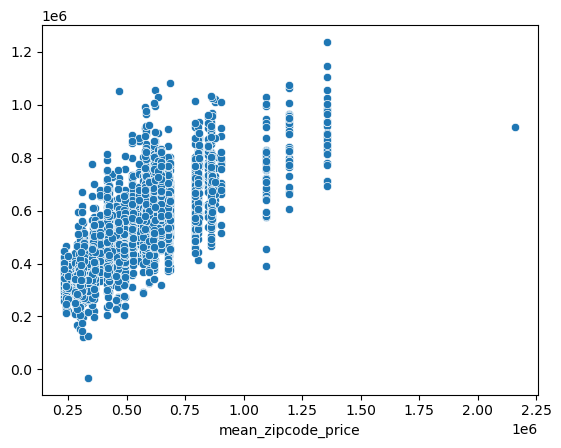

In [250]:
sns.scatterplot(x=y_test, y=y_pred_test);

In [251]:
y_pred_test2 = lin_reg2.predict(X_test_standarized_df)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") 
print(f"MSE {mean_squared_error(y_pred_test2, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test2, y_test): .2f}")
print(f"R2 score, {lin_reg2.score(X_test_standarized_df, y_test): .2f}")

MAE  94349.68
MSE  16806993212.07
RMSE,  129641.79
R2 score,  0.59


In [252]:
results = pd.DataFrame({"y_test": y_test, "lin_reg": y_pred_test, "lin_reg2": y_pred_test2})
results

,y_test,lin_reg,lin_reg2
16607,676185.392157,429693.581875,429693.581875
15557,487479.627119,372888.629345,372888.629345
1285,353608.635165,428041.749892,428041.749892
5964,791820.807571,735002.380882,735002.380882
7051,294111.278571,362926.088471,362926.088471
...,...,...,...
12998,790576.654596,570571.595323,570571.595323
12561,521652.858716,863249.848896,863249.848896
5286,286732.791583,285180.202381,285180.202381
16069,462480.035336,556729.602025,556729.602025


In [253]:
results_melted = results.melt(id_vars="y_test")
results_melted

,y_test,variable,value
0,676185.392157,lin_reg,429693.581875
1,487479.627119,lin_reg,372888.629345
2,353608.635165,lin_reg,428041.749892
3,791820.807571,lin_reg,735002.380882
4,294111.278571,lin_reg,362926.088471
...,...,...,...
8183,790576.654596,lin_reg2,570571.595323
8184,521652.858716,lin_reg2,863249.848896
8185,286732.791583,lin_reg2,285180.202381
8186,462480.035336,lin_reg2,556729.602025


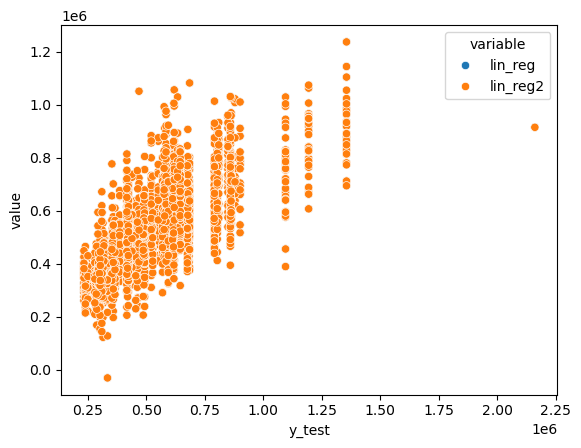

In [254]:
sns.scatterplot(data=results_melted, y="value", x="y_test", hue="variable");

In [255]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm_df.columns, lin_reg.coef_)}
lin_reg_coef

{'price': np.float64(997435.1655643972),
 'bedrooms': np.float64(54820.7578486221),
 'bathrooms': np.float64(-93070.43589545148),
 'sqft_living': np.float64(-359823.4081005936),
 'sqft_lot': np.float64(-526755.164677686),
 'floors': np.float64(49041.99524537008),
 'waterfront': np.float64(-113185.69346687286),
 'view': np.float64(-157740.6913236963),
 'condition': np.float64(-43786.06973924454),
 'grade': np.float64(-148163.93849311006),
 'sqft_above': np.float64(-448370.5944241201),
 'sqft_basement': np.float64(-64300.18611819911),
 'yr_built': np.float64(-6494.060955220611),
 'zipcode': np.float64(-86738.17239475233),
 'sqft_living15': np.float64(158099.91551083492),
 'sqft_lot15': np.float64(-2385.238692220806)}

In [256]:
lin_reg.intercept_

np.float64(466791.1407399882)

## Decision Tree

In [257]:
tree = DecisionTreeRegressor(max_depth=10)

In [258]:
tree.fit(X_train_norm_df, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [259]:
X_train_norm_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
12258,0.275534,0.090909,0.200000,0.141864,0.004628,0.0,0.0,0.00,0.50,0.545455,0.189591,0.000000,0.434783,0.666667,0.151835,0.012338
126,0.351544,0.090909,0.300000,0.251739,0.004653,0.0,0.0,0.50,0.50,0.636364,0.247212,0.176471,0.582609,0.893939,0.496814,0.014396
2745,0.698337,0.090909,0.266667,0.358832,0.003538,0.2,0.0,0.25,0.75,0.636364,0.278810,0.397059,0.400000,0.575758,0.419908,0.010385
20704,0.432304,0.121212,0.400000,0.278164,0.002777,0.4,0.0,0.00,0.50,0.636364,0.371747,0.000000,0.973913,0.136364,0.450670,0.007954
13239,0.228979,0.060606,0.133333,0.061196,0.002738,0.0,0.0,0.00,0.50,0.454545,0.081784,0.000000,0.234783,0.631313,0.085915,0.007838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11881,0.289786,0.121212,0.333333,0.282337,0.005790,0.4,0.0,0.00,0.50,0.545455,0.377323,0.000000,0.817391,0.186869,0.353988,0.012120
12596,0.270784,0.090909,0.233333,0.176634,0.004489,0.4,0.0,0.00,0.75,0.545455,0.236059,0.000000,0.695652,0.292929,0.290266,0.013254
5671,0.403800,0.090909,0.433333,0.171071,0.000594,0.8,0.0,0.00,0.50,0.545455,0.228625,0.000000,0.869565,0.535354,0.246319,0.001200
903,0.118765,0.030303,0.200000,0.100139,0.000386,0.4,0.0,0.00,0.50,0.636364,0.122677,0.022059,0.930435,0.631313,0.211162,0.001852


In [260]:
y_test

16607    676185.392157
15557    487479.627119
1285     353608.635165
5964     791820.807571
7051     294111.278571
             ...      
12998    790576.654596
12561    521652.858716
5286     286732.791583
16069    462480.035336
4768     455617.112903
Name: mean_zipcode_price, Length: 4094, dtype: float64

In [261]:
y_pred_test_dt = tree.predict(X_test_norm_df)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test_norm_df, y_test): .2f}")

MAE,  39382.44
MSE,  6067109606.37
RMSE,  77891.65
R2 score,  0.85


In [262]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm_df.columns, tree.feature_importances_)}
tree_importance

{'price': np.float64(0.4832898973301541),
 'bedrooms': np.float64(0.0009110932741316535),
 'bathrooms': np.float64(0.0006151253902010553),
 'sqft_living': np.float64(0.0590243164761462),
 'sqft_lot': np.float64(0.008454170698158818),
 'floors': np.float64(0.0003855803294441528),
 'waterfront': np.float64(0.0),
 'view': np.float64(8.670373333700869e-07),
 'condition': np.float64(0.0010126623779769786),
 'grade': np.float64(0.005042018208339152),
 'sqft_above': np.float64(0.002910974330413382),
 'sqft_basement': np.float64(0.0005589312114772953),
 'yr_built': np.float64(0.02787051551942443),
 'zipcode': np.float64(0.40276359232678505),
 'sqft_living15': np.float64(0.0007774957923136693),
 'sqft_lot15': np.float64(0.0063827596977008025)}

In [263]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm_df.columns))
print(tree_viz)

|--- price <= 0.36
|   |--- price <= 0.24
|   |   |--- zipcode <= 0.16
|   |   |   |--- zipcode <= 0.02
|   |   |   |   |--- zipcode <= 0.01
|   |   |   |   |   |--- zipcode <= 0.00
|   |   |   |   |   |   |--- value: [280804.69]
|   |   |   |   |   |--- zipcode >  0.00
|   |   |   |   |   |   |--- sqft_above <= 0.15
|   |   |   |   |   |   |   |--- sqft_lot15 <= 0.01
|   |   |   |   |   |   |   |   |--- value: [234284.04]
|   |   |   |   |   |   |   |--- sqft_lot15 >  0.01
|   |   |   |   |   |   |   |   |--- value: [234284.04]
|   |   |   |   |   |   |--- sqft_above >  0.15
|   |   |   |   |   |   |   |--- price <= 0.07
|   |   |   |   |   |   |   |   |--- value: [234284.04]
|   |   |   |   |   |   |   |--- price >  0.07
|   |   |   |   |   |   |   |   |--- price <= 0.09
|   |   |   |   |   |   |   |   |   |--- value: [234284.04]
|   |   |   |   |   |   |   |   |--- price >  0.09
|   |   |   |   |   |   |   |   |   |--- sqft_above <= 0.15
|   |   |   |   |   |   |   |   |   |   |--- 

In [264]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm_df, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm_df.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'